### Step 0

Copy your compute-bound function and inputs from before.

In [1]:
def complex_cube(x):
    return x * x * x * 0.3

def crunch_numbers(num):
    out = 0.0
    for x in range(num):
        out += complex_cube(x)
    return out

In [2]:
input_data =  [30_000_000, 10_000_000, 40_000_000]  # TODO a list of inputs for your `crunch_numbers` function

### Step 1
Use the `(Process)Pool` to parallelize your code. Time it and compare execution times.

In [3]:
from multiprocessing.pool import Pool as ProcessPool

In [4]:
%%time
# TODO implement a thread-parallel version
with ProcessPool(processes=4) as pool:
    results = pool.map(crunch_numbers, input_data)

CPU times: user 4.94 ms, sys: 9.72 ms, total: 14.7 ms
Wall time: 8.59 s


### Step 2
Now, compare its runtime for different numbers of processes.

In [11]:
from multiprocessing.pool import Pool as ProcessPool
import time
import numpy as np

# TODO replace with meaningful input to your function; keep in mind
# that the "load" on each process should be approximately balanced
# to observe (close to) ideal speedups
input_data = [3_000_000, 1_000_000, 4_000_000, 3_000_000, 1_000_000, 4_000_000, 3_000_000, 1_000_000, 4_000_000]

n_processes = np.arange(1, 9)
times = []
for n in n_processes:
    t0 = time.time()
    # TODO implement process-parallel number crunching using a `ProcessPool` **here**
    with ProcessPool(processes=n) as pool:
        results = pool.map(crunch_numbers, input_data)
    times.append(time.time() - t0)

times

[3.9823663234710693,
 2.1604981422424316,
 2.2976396083831787,
 2.5617339611053467,
 2.4599342346191406,
 2.3868157863616943,
 2.35048508644104,
 2.408477306365967]

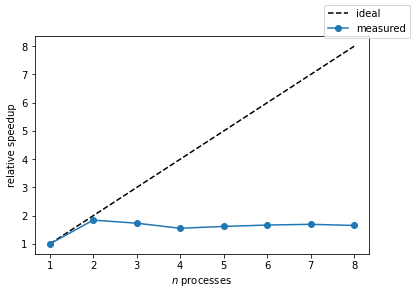

In [12]:
# TODO execute me after the cell above
import matplotlib.pyplot as plt
import numpy as np

times = np.array(times)
fig, axes = plt.subplots()
axes.plot(n_processes, 1.0 * n_processes, color='k', linestyle='--', label='ideal')
axes.plot(n_processes, times[0] / times, marker='o', label='measured')
axes.set_xlabel(r'$n$ processes')
axes.set_ylabel('relative speedup')
fig.legend()

### Step 3 (bonus exercise)
Investigate the speedup for
- short compute-bound functions, i.e., when a single function call doesn't take much time
- unbalanced problems, i.e., scenarios in which most results are fast to compute, but some take long

Discuss.